In [2]:
import sys
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from Data_Generation_Functions import *
import numpy as np

c_Exact = "red"
c_under = "royalblue"
c_Gard = 'lime'
c_under_Corr = "orange"
c_Gard_Corr = "Gray"

SOCF = SOCF_Type.G2


Cython acceleration could not be loaded.
Falling back on Python equivalents... 
Cython acceleration could not be loaded. 
Falling back on Python equivalents...

Computing g2: 100%|██████████| 501/501 [00:00<00:00, 299849.64config/s]


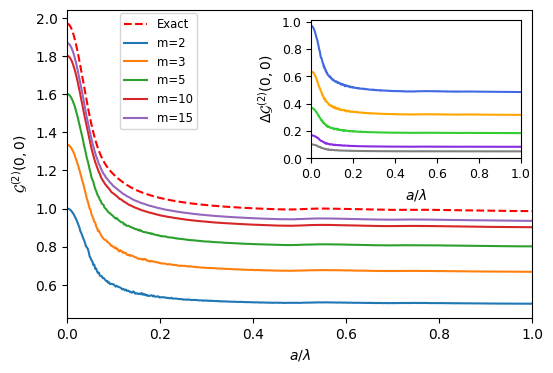

In [3]:
# (fig 3) Plot Convergance of MWise Approximation with Sample Size
N = 8
Dim = 2
m_set = [2, 3, 5, 10, 15]
Num_Samples = 1000
a_set = np.round(np.linspace(0, 1, 501),10)

fig, ax = plt.subplots(figsize=(6, 4))

#Plot Exact Solution
Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", color="red", linestyle='dashed')

ax_inset = inset_axes(ax, width="45%", height="45%", loc="upper right", bbox_to_anchor=(-0.01, -0.01, 1, 1), bbox_transform=ax.transAxes)

#Plot M-Wise Approximations
color_set = ["royalblue", 'orange', 'limegreen', 'blueviolet', 'grey']
for m in m_set:
    Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=Num_Samples)
    Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)

    MWise_a, MWise_g2 = map(list, zip(*Data))
    MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) # Sort both lists based on MWise_a values
    ax.plot(MWise_a, MWise_g2, label=f"m={m}")

    ax_inset.plot(MWise_a, np.abs(np.array(MWise_g2) - np.array(Exact_g2)), c=color_set[m_set.index(m)])

ax.set_xlabel('$a/\lambda$')
ax.set_ylabel('$\mathcal{G}^{(2)}(0,0)$')
ax.set_xlim([0, 1])
ax.legend(bbox_to_anchor=(0.1, 0.8), loc='center left', fontsize='small')

ax_inset.set_xlabel('$a/\lambda$')
ax_inset.set_ylabel('$\Delta \mathcal{G}^{(2)}(0,0)$')
ax_inset.set_xlim([0, 1])
ax_inset.tick_params(labelsize=9) 
ax_inset.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.show()


Computing g2: 100%|██████████| 501/501 [00:00<00:00, 266060.56config/s]


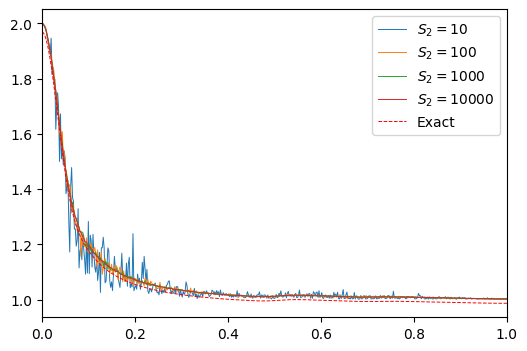

In [4]:
#See the effect of altering the number of samples (S_2) on pairwise method
N = 8
Dim = 2
a_set = np.round(np.linspace(0, 1, 501),10)

fig, ax = plt.subplots(figsize=(6, 4))

S_Set = [10, 100, 1000, 10000]
for S_2 in S_Set:
    Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, 2, Num_Samples=S_2)
    Filename_m = Samples_Pair.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)
    Pair_a, Pair_g2 = map(list, zip(*Data))
    Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2) 
    ax.plot(Pair_a, Pair_g2, label=f"$S_2 = {S_2}$", linewidth=0.7)

Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", color="red", linestyle='dashed', linewidth=0.7)

ax.set_xlim(0,1)
ax.legend()
plt.show()



Text(0, 0.5, '$R(t)/R(0)$')

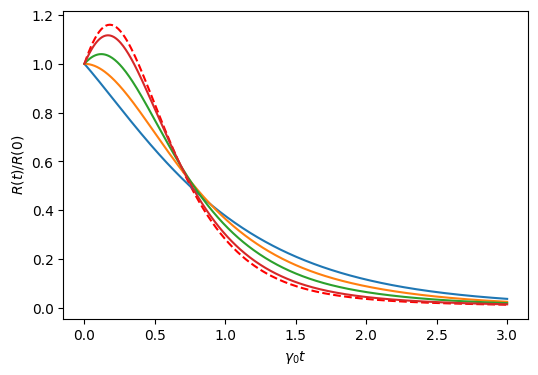

In [9]:
# (Fig 4) Generate Exact Emission Data and m-wise approximation
Dim = 1
N = 9
m_set = [2, 4, 6, 8]
S = 1000
a = 0.1
t_max = 3

#Generate Exact Emission Data
Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=S)
Filename_Exact = Samples_Exact.Generate_Emission_Data(a, t_max, res=501)
Data_Exact = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_t, Exact_g2 = map(list, zip(*Data_Exact))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Exact_t, Exact_g2, label="Exact", color="red", linestyle='dashed')

for m in m_set:
    Samples_MWise = Sampling_Methods(SOCF_Type.G2, Approx.MWISE, N, Dim, m, Num_Samples=S)
    Filename_m = Samples_MWise.Generate_Emission_Data(a, t_max)
    Data_m = Read_Write_Class.Read_From_File(Filename_m)
    MWise_t, MWise_g2 = map(list, zip(*Data_m))
    ax.plot(MWise_t, MWise_g2, label=f"m={m}")

ax.set_xlabel('$\gamma_0 t$')
ax.set_ylabel('$R(t)/R(0)$')



Computing g2: 100%|██████████| 501/501 [00:00<00:00, 489254.09config/s]


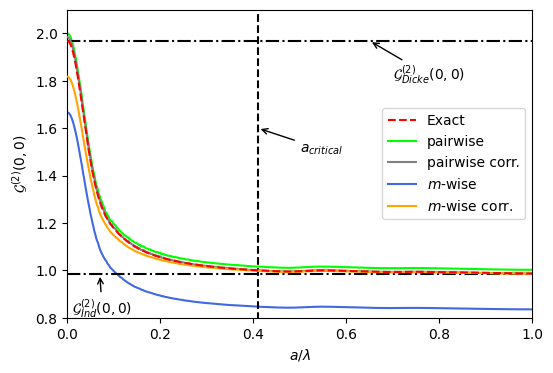

In [6]:
# (Fig 5) Plot Comparison of Exact and approx methods
N = 8
Dim = 2
m = 6
Num_Samples = 1000
S_2 = 10000
S_m = 5000
a_set = np.round(np.linspace(0, 1, 501),10)

fig, ax = plt.subplots(figsize=(6, 4))

Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", linestyle='dashed', c=c_Exact, zorder=5)

Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=S_m)
Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_m)
MWise_a, MWise_g2 = map(list, zip(*Data))
MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) # Sort both lists based on MWise_a values

Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, 2, Num_Samples=S_2)
Filename_Pair = Samples_Pair.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Pair)
Pair_a, Pair_g2 = map(list, zip(*Data))
Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2) 


Mwise_Offset = 1/m - 1/N**Dim
Pair_Offset = 1/N**Dim

ax.plot(Pair_a, Pair_g2, label="pairwise", c=c_Gard, zorder=1)
ax.plot(Pair_a, np.array(Pair_g2) - Pair_Offset, label="pairwise corr.", c=c_Gard_Corr, zorder=3)
ax.plot(MWise_a, MWise_g2, label="$m$-wise", c=c_under, zorder=1)
ax.plot(MWise_a, np.array(MWise_g2) + Mwise_Offset, label="$m$-wise corr.", c=c_under_Corr, zorder=3)


ax.plot([0,1],[2*63/64,2*63/64], linestyle='dashdot', c='black')
ax.plot([0,1],[63/64, 63/64], linestyle='dashdot', c='black')

a_trans = Exact_a[np.argmin(np.abs(np.array(Exact_g2)-1))]
ax.plot([a_trans, a_trans],[0.79, 2.2], linestyle='dashed', c='black')

ax.annotate("$a_{critical}$", xy=(a_trans, 1.6),  xytext=(0.5, 1.5), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
ax.annotate("$\mathcal{G}_{Dicke}^{(2)}(0,0)$", xy=(0.65, 2*63/64),  xytext=(0.7, 1.8), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
ax.annotate("$\mathcal{G}_{Ind}^{(2)}(0,0)$", xy=(0.07, 63/64),  xytext=(0.01, 0.815), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)

ax.set_xlabel('$a/\lambda$')
ax.set_ylabel('$\mathcal{G}^{(2)}(0,0)$')
ax.set_ylim([0.8, 2.1])
ax.set_xlim([0, 1])
ax.legend()
plt.show()

Computing g2: 100%|██████████| 501/501 [00:00<00:00, 485860.42config/s]


Text(13, 16, '$N=2m$')

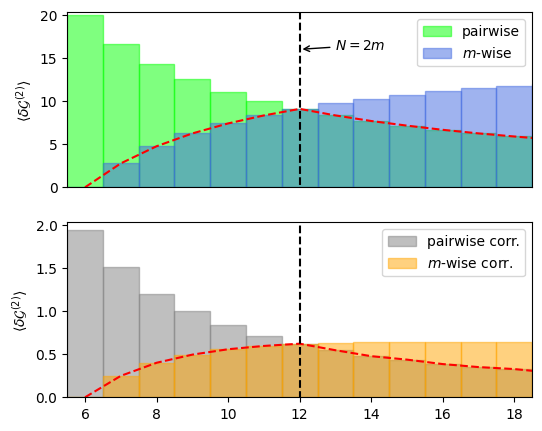

In [7]:
# (Fig 6) Plot showing the analyitcal condition N < 2m for inverted array  (with and without correction)

Dim = 1
m = 6
N_Set = np.arange(m, 20)
S_2 = 10000
S_m = 5000

a_set = np.round(np.linspace(0, 1, 501),10)

fig, axes = plt.subplots(2, 1, figsize=(6, 5))


Diff_Pair = []
Diff_Pair_corr = []
Diff_m = []
Diff_m_corr = []
for N in N_Set:
    m_corr = 1/m - 1/N
    pair_corr = 1/N

    Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=S_m)
    Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_Exact)
    Exact_a, Exact_g2 = map(list, zip(*Data))
    Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2)

    Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=S_m)
    Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)
    MWise_a, MWise_g2 = map(list, zip(*Data))
    MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2)

    Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, 2, Num_Samples=S_2)
    Filename_m = Samples_Pair.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)
    Pair_a, Pair_g2 = map(list, zip(*Data))
    Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2)

    Diff_Pair.append(100 * np.mean(np.abs(np.array(Pair_g2) - np.array(Exact_g2)) / np.array(Exact_g2)))
    Diff_Pair_corr.append(100 * np.mean(np.abs(np.array(Pair_g2) - pair_corr - np.array(Exact_g2)) / np.array(Exact_g2)))
    Diff_m.append(100 * np.mean(np.abs(np.array(MWise_g2) - np.array(Exact_g2)) / np.array(Exact_g2)))
    Diff_m_corr.append(100 * np.mean(np.abs(np.array(MWise_g2) + m_corr - np.array(Exact_g2)) / np.array(Exact_g2)))

axes[0].bar(N_Set, Diff_Pair, width=1, alpha=0.5, facecolor=c_Gard, edgecolor=c_Gard, label="pairwise")
axes[1].bar(N_Set, Diff_Pair_corr, width=1, alpha=0.5, facecolor=c_Gard_Corr, edgecolor=c_Gard_Corr, label="pairwise corr.")

axes[0].bar(N_Set, Diff_m, width=1, alpha=0.5, facecolor=c_under, edgecolor=c_under, label="$m$-wise")
axes[1].bar(N_Set, Diff_m_corr, width=1, alpha=0.5, facecolor=c_under_Corr, edgecolor=c_under_Corr, label='$m$-wise corr.')

Min = np.minimum(Diff_m, Diff_Pair)
axes[0].plot(N_Set, Min, c='red', linestyle='dashed')
Min_Corr = np.minimum(Diff_m_corr, Diff_Pair_corr)
axes[1].plot(N_Set, Min_Corr, c='red', linestyle='dashed')

axes[0].set_xticks([])
axes[1].set_xticks([i for i in N_Set if i%2 == 0])
axes[0].set_ylim([0,20.3])
axes[1].set_ylim([0,2.03])
for i in range(2):
    axes[i].set_xlim([min(N_Set)-0.5, max(N_Set)-0.5])
    axes[i].plot([2*m, 2*m], [-1, 30], linestyle='dashed', c='black')
    axes[i].set_ylabel("$\\langle \delta \mathcal{G}^{(2)} \\rangle$")
    axes[i].legend()

axes[0].annotate("$N=2m$", xy=(2*m, 16),  xytext=(2*m+1, 16), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)


/var/folders/v9/tkrj32v93f7gq23z84qvvd8c0000gn/T/ipykernel_1024/3025547953.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


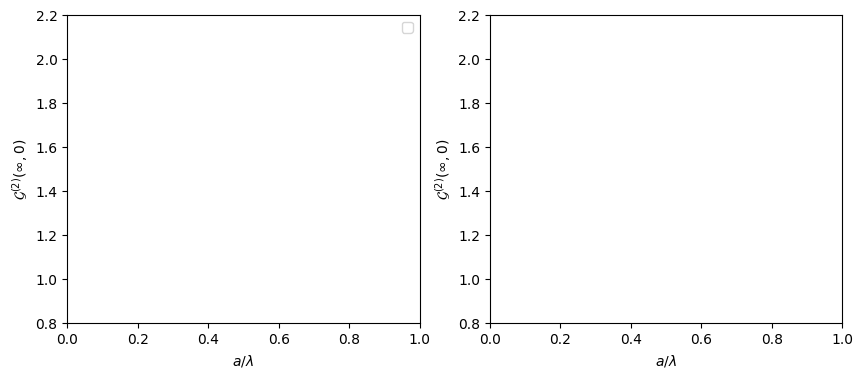

In [ ]:
# (Fig 7) Comaprison of approximaitons in the Steady state
k = [1,0,0]
gamma_0 = 1/3*np.pi
Rabi = 5*gamma_0

m = 6
S_m = 100
S_2 = 10000

a_set = np.round(np.linspace(0, 1, 501),10)[1:]
print(a_set)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))









for i in range(2):
    axes[i].set_xlabel("$a/\lambda$")
    axes[i].set_ylabel("$\mathcal{G}^{(2)}(\infty, 0)$")
    axes[i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes[i].set_xlim([np.min(a_set), np.max(a_set)])
    axes[i].set_ylim([0.8, 2.2])
axes[0].legend()
plt.show()
